In [1]:
# ================================
# STEP 1: Load Dataset
# ================================
import pandas as pd

df = pd.read_csv("batch_1.csv")
X = df["text"]
y = df["label"]

print("Dataset shape:", df.shape)
print(df["label"].value_counts())


Dataset shape: (9999, 3)
label
1    5628
0    4284
2      87
Name: count, dtype: int64


In [2]:
# ================================
# STEP 2: Train-Test Split
# ================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 7999
Test size: 2000


In [3]:
# ================================
# STEP 3: TF-IDF Vectorizer
# ================================
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF shape:", X_train_tfidf.shape)


TF-IDF shape: (7999, 5000)


In [4]:
# ================================
# STEP 4: Define Models
# ================================
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42)
}



===== Logistic Regression =====
Accuracy: 0.6075
                        precision    recall  f1-score   support

          Rejected (0)       0.55      0.60      0.57       857
          Accepted (1)       0.68      0.62      0.65      1126
Partially Accepted (2)       0.11      0.29      0.16        17

              accuracy                           0.61      2000
             macro avg       0.45      0.50      0.46      2000
          weighted avg       0.62      0.61      0.61      2000



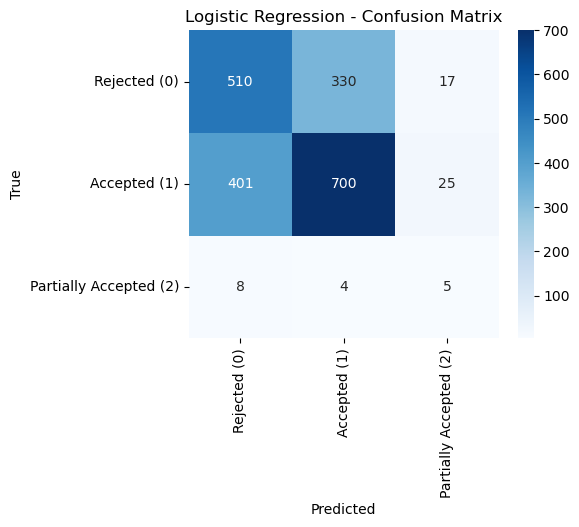


===== Naive Bayes =====
Accuracy: 0.5935
                        precision    recall  f1-score   support

          Rejected (0)       0.54      0.41      0.47       857
          Accepted (1)       0.62      0.74      0.67      1126
Partially Accepted (2)       0.00      0.00      0.00        17

              accuracy                           0.59      2000
             macro avg       0.39      0.38      0.38      2000
          weighted avg       0.58      0.59      0.58      2000



c:\Users\apaas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\apaas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\apaas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


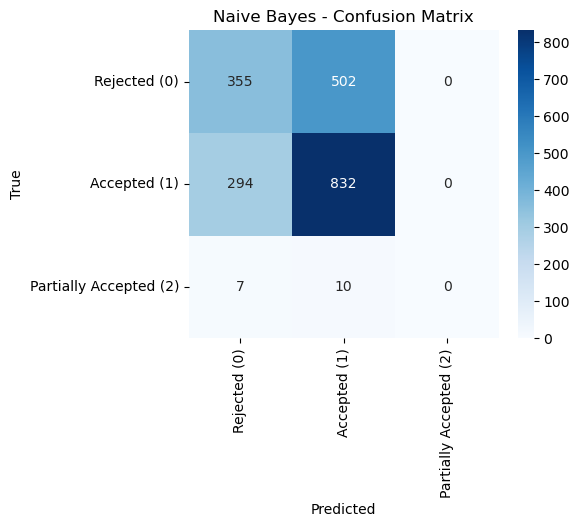


===== Linear SVM =====
Accuracy: 0.61
                        precision    recall  f1-score   support

          Rejected (0)       0.56      0.54      0.55       857
          Accepted (1)       0.65      0.67      0.66      1126
Partially Accepted (2)       0.08      0.06      0.07        17

              accuracy                           0.61      2000
             macro avg       0.43      0.42      0.43      2000
          weighted avg       0.61      0.61      0.61      2000



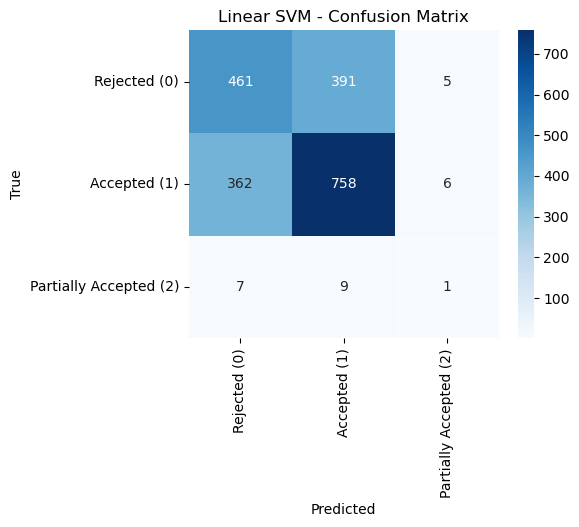


===== Random Forest =====
Accuracy: 0.631
                        precision    recall  f1-score   support

          Rejected (0)       0.64      0.36      0.46       857
          Accepted (1)       0.63      0.85      0.72      1126
Partially Accepted (2)       0.00      0.00      0.00        17

              accuracy                           0.63      2000
             macro avg       0.42      0.40      0.39      2000
          weighted avg       0.63      0.63      0.60      2000



c:\Users\apaas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\apaas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\apaas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


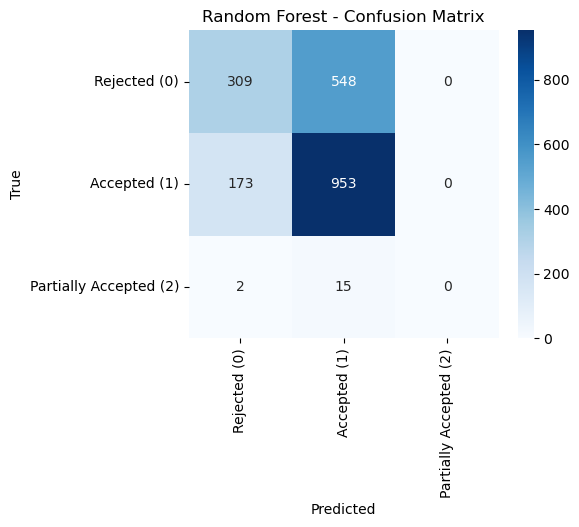

In [5]:
# ================================
# STEP 5: Training & Evaluation
# ================================
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

results = {}

for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred, target_names=["Rejected (0)", "Accepted (1)", "Partially Accepted (2)"]))

    # Save results
    results[name] = {
        "model": model,
        "y_pred": y_pred,
        "acc": acc
    }

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Rejected (0)", "Accepted (1)", "Partially Accepted (2)"],
                yticklabels=["Rejected (0)", "Accepted (1)", "Partially Accepted (2)"])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


c:\Users\apaas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\apaas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


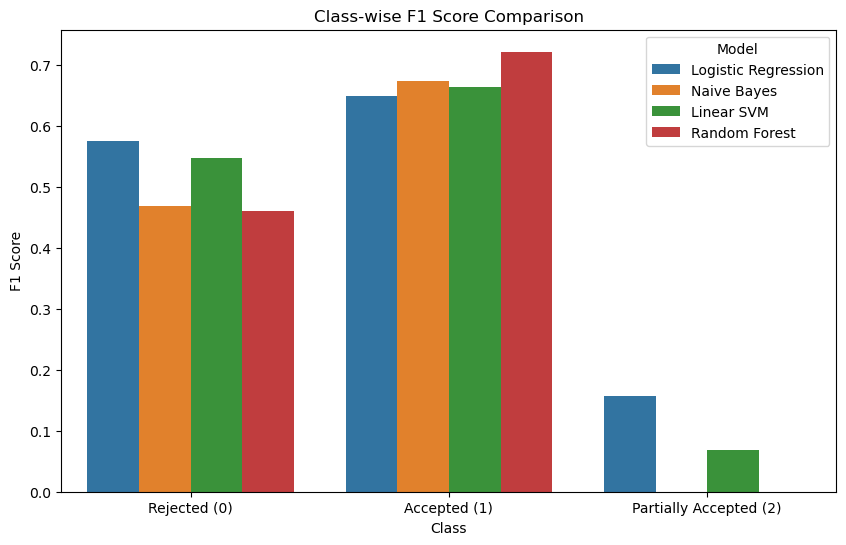

In [6]:
# ================================
# STEP 6: Class-wise Precision/Recall/F1 Bar Chart
# ================================
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

metrics_df = pd.DataFrame()

for name, res in results.items():
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, res["y_pred"], average=None)
    temp = pd.DataFrame({
        "Model": name,
        "Class": ["Rejected (0)", "Accepted (1)", "Partially Accepted (2)"],
        "Precision": prec,
        "Recall": rec,
        "F1": f1
    })
    metrics_df = pd.concat([metrics_df, temp])

plt.figure(figsize=(10,6))
sns.barplot(data=metrics_df, x="Class", y="F1", hue="Model")
plt.title("Class-wise F1 Score Comparison")
plt.ylabel("F1 Score")
plt.show()


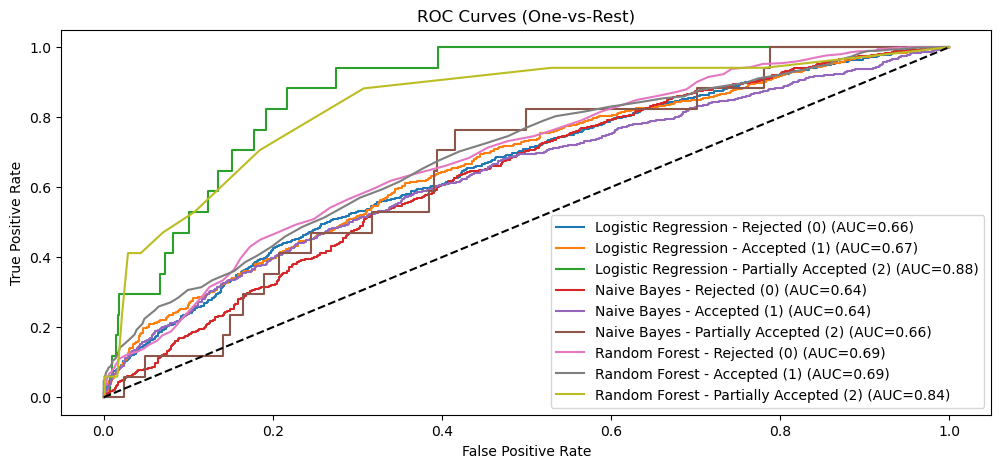

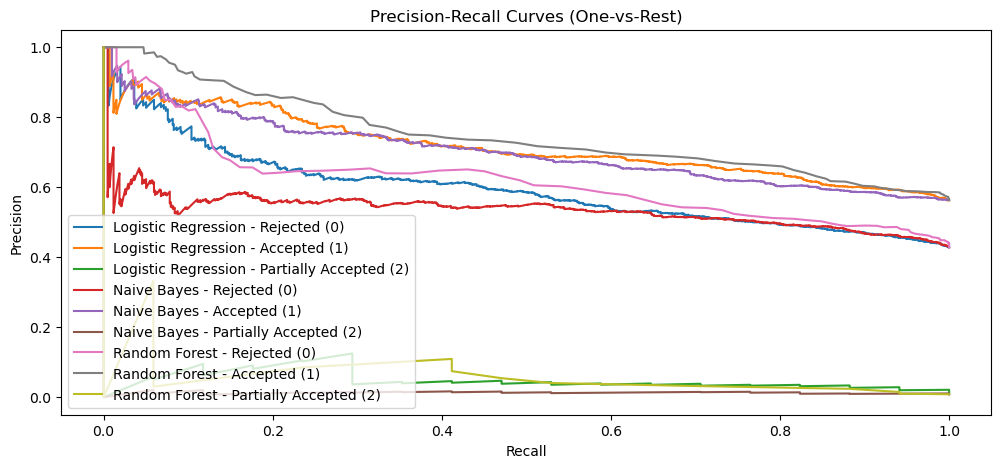

In [7]:
# ================================
# STEP 7: ROC & Precision-Recall Curves (One-vs-Rest)
# ================================
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Binarize labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0,1,2])

plt.figure(figsize=(12,5))

for name, res in results.items():
    model = res["model"]
    # Some models (like LinearSVC) don’t have predict_proba, so skip them
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_tfidf)
        
        for i, class_name in enumerate(["Rejected (0)", "Accepted (1)", "Partially Accepted (2)"]):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"{name} - {class_name} (AUC={roc_auc:.2f})")

plt.plot([0,1], [0,1], "k--")  # random baseline
plt.title("ROC Curves (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Precision-Recall Curves
plt.figure(figsize=(12,5))

for name, res in results.items():
    model = res["model"]
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_tfidf)
        
        for i, class_name in enumerate(["Rejected (0)", "Accepted (1)", "Partially Accepted (2)"]):
            precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
            plt.plot(recall, precision, label=f"{name} - {class_name}")

plt.title("Precision-Recall Curves (One-vs-Rest)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()
